In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('./data/titanic.csv')

df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.55,C87,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.50,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.50,NaN,S


In [32]:
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.") 

El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


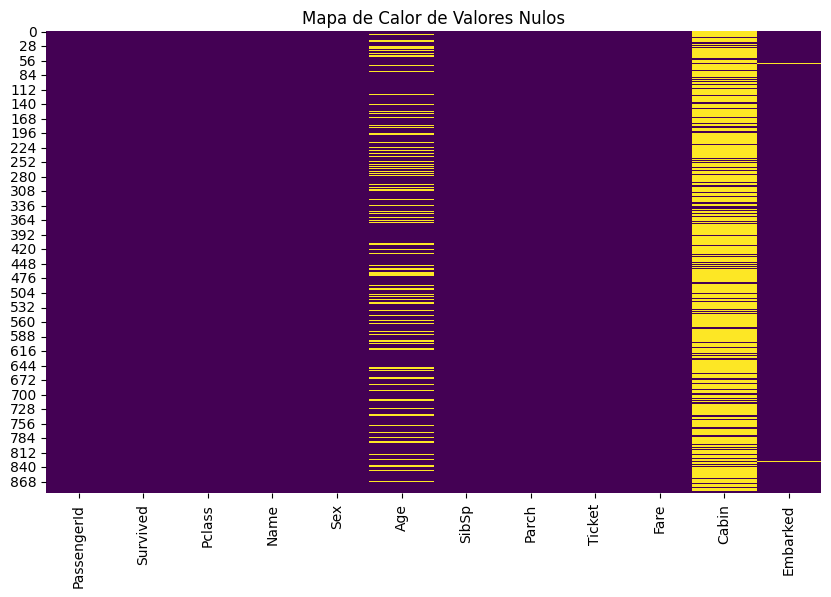

In [37]:


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Valores Nulos')

plt.savefig('output.png', format='png')

plt.show()

In [38]:
missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


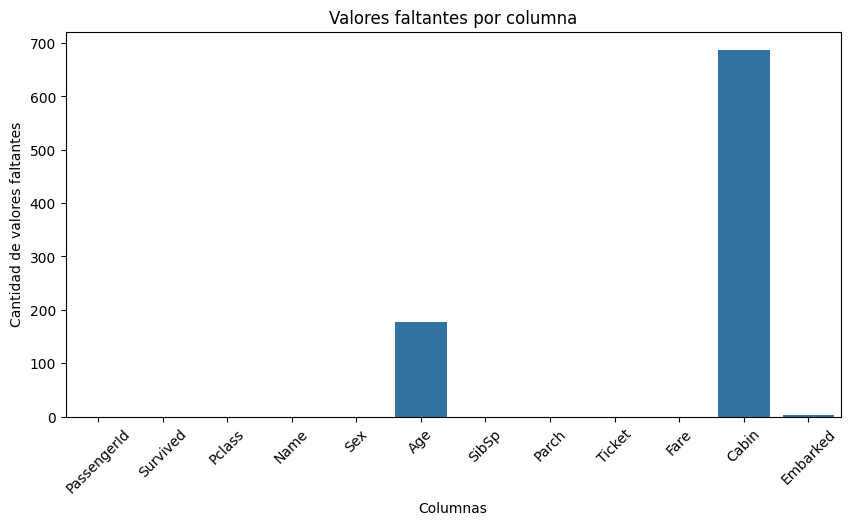

In [39]:
missing_values = df.isnull().sum()

# Convertir a DataFrame
missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores faltantes': missing_values.values
})

# Crear gráfica de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_df, x='Columna', y='Valores faltantes')
plt.xticks(rotation=45)
plt.title('Valores faltantes por columna')
plt.ylabel('Cantidad de valores faltantes')
plt.xlabel('Columnas')

plt.show()

In [48]:
df.drop('Cabin', axis = 1, inplace = True)

In [49]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

C:\Users\kassy\AppData\Local\Temp\ipykernel_22604\4033722866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [50]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [51]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [54]:
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [55]:
df.to_csv('./data/titanic_clean.csv', index=False)